In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Creating a Table From Scratch ##

In [4]:
streets = Table().with_columns("Streets", make_array("Bancroft", "Durant", "Channing", "Haste", "Dwight"),
                    "Blocks Away From Campus", np.arange(5))
streets

Streets,Blocks Away From Campus
Bancroft,0
Durant,1
Channing,2
Haste,3
Dwight,4


In [5]:
streets

Streets,Blocks Away From Campus
Bancroft,0
Durant,1
Channing,2
Haste,3
Dwight,4


In [6]:
restaurants = make_array("Blue Door", "House of Curries", "Crossroads", "Sliver", "Bongo Burger")

In [9]:
streets = streets.with_columns("Restaurants", restaurants)

In [10]:
streets

Streets,Blocks Away From Campus,Restaurants
Bancroft,0,Blue Door
Durant,1,House of Curries
Channing,2,Crossroads
Haste,3,Sliver
Dwight,4,Bongo Burger


In [13]:
streets.num_columns

3

In [14]:
streets.num_rows

5

In [17]:
streets.where('Streets', are.containing('e')).num_rows

1

In [18]:
streets.labels

('Streets', 'Blocks Away From Campus', 'Restaurants')

In [23]:
streets = streets.relabeled('Streets', 'Street Name')

ValueError: Invalid labels. Column labels must already exist in table in order to be replaced.

In [24]:
streets.sort('Street Name')

Street Name,Blocks Away From Campus,Restaurants
Bancroft,0,Blue Door
Channing,2,Crossroads
Durant,1,House of Curries
Dwight,4,Bongo Burger
Haste,3,Sliver


## Reading A Table From A File ##

In [25]:
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City,Direction,Survivors
24,54.9,Kaunas,Advance,340000
30.2,55.2,Vitebsk,Advance,175000
32,54.8,Smolensk,Advance,145000
37.6,55.8,Moscow,Advance,100000
34.3,55.2,Vyazma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orsha,Retreat,20000
26.8,54.3,Maladyechna,Retreat,12000
24.1,54.4,Kaunas,Retreat,4000


In [30]:
minard.column('Survivors').item(0)

340000

In [38]:
initial_count = minard.column('Survivors').item(0)
initial_count

340000

In [40]:
survivors = minard.column('Survivors')
survivors

array([340000, 175000, 145000, 100000,  55000,  24000,  20000,  12000,
         4000])

In [42]:
percent_surviving = survivors / initial_count * 100
percent_surviving

array([ 100.        ,   51.47058824,   42.64705882,   29.41176471,
         16.17647059,    7.05882353,    5.88235294,    3.52941176,
          1.17647059])

In [43]:
minard.with_column('Percent Surviving', percent_surviving)

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
24,54.9,Kaunas,Advance,340000,100
30.2,55.2,Vitebsk,Advance,175000,51.4706
32,54.8,Smolensk,Advance,145000,42.6471
37.6,55.8,Moscow,Advance,100000,29.4118
34.3,55.2,Vyazma,Retreat,55000,16.1765
32,54.6,Smolensk,Retreat,24000,7.05882
30.4,54.4,Orsha,Retreat,20000,5.88235
26.8,54.3,Maladyechna,Retreat,12000,3.52941
24.1,54.4,Kaunas,Retreat,4000,1.17647


In [44]:
proportion_surviving = survivors / initial_count

In [46]:
minard.with_column('Survivors', proportion_surviving).set_format('Survivors', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors
24,54.9,Kaunas,Advance,100.00%
30.2,55.2,Vitebsk,Advance,51.47%
32,54.8,Smolensk,Advance,42.65%
37.6,55.8,Moscow,Advance,29.41%
34.3,55.2,Vyazma,Retreat,16.18%
32,54.6,Smolensk,Retreat,7.06%
30.4,54.4,Orsha,Retreat,5.88%
26.8,54.3,Maladyechna,Retreat,3.53%
24.1,54.4,Kaunas,Retreat,1.18%


## Calculating and adding data to a table ##

In [47]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [51]:
#total gross/average ticket price
#pull out the total gross column, and divide that by the average ticket price column
#add the resulting array back into our original table
total_gross = movies.column('Total Gross')
average_price = movies.column("Average Ticket Price")
approx_attendance = total_gross / average_price * 1e6
approx_attendance

array([  1.32010676e+09,   1.26815177e+09,   1.34361624e+09,
         1.36148241e+09,   1.28301387e+09,   1.33911280e+09,
         1.41273333e+09,   1.34132312e+09,   1.40462209e+09,
         1.40603053e+09,   1.37917317e+09,   1.51054750e+09,
         1.53228856e+09,   1.57844828e+09,   1.48893805e+09,
         1.42133581e+09,   1.47193676e+09,   1.48166311e+09,
         1.38690632e+09,   1.33744344e+09,   1.26287356e+09,
         1.32259804e+09,   1.24497585e+09,   1.17373494e+09,
         1.14090261e+09,   1.19000000e+09,   1.26150376e+09,
         1.08476886e+09,   1.08769821e+09,   1.01832884e+09,
         1.05611268e+09,   1.19970238e+09,   1.19555556e+09,
         1.17448980e+09,   1.06690647e+09,   1.02193309e+09])

In [54]:
movies = movies.with_columns('Attendance', approx_attendance)
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Attendance
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),1.28301e+09
2010,7.89,10565.6,536,Toy Story 3,1.33911e+09
2009,7.5,10595.5,521,Avatar,1.41273e+09
2008,7.18,9630.7,608,The Dark Knight,1.34132e+09
2007,6.88,9663.8,631,Spider-Man 3,1.40462e+09
2006,6.55,9209.5,608,Dead Man's Chest,1.40603e+09


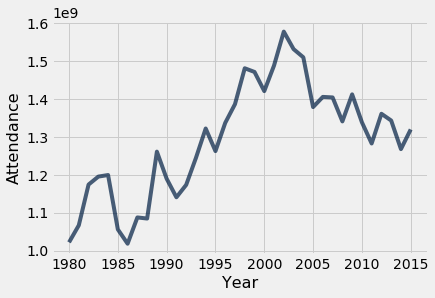

In [55]:
movies.plot('Year', 'Attendance')

In [57]:
movies.sort('Attendance', descending = True).column('Year').item(0)

2002

## Lecture 5  Part 2 - Examples

In [58]:
heroes = make_array('Batman', 'Aquaman', 'Spiderman', 'Captain Marvel','Wonder Woman')
heroes

array(['Batman', 'Aquaman', 'Spiderman', 'Captain Marvel', 'Wonder Woman'], 
      dtype='<U14')

In [59]:
superheroes = Table().with_columns(
    'Name', heroes,
    'Coolness', np.arange(len(heroes))) # originally said np.arange(5)

In [60]:
superheroes

Name,Coolness
Batman,0
Aquaman,1
Spiderman,2
Captain Marvel,3
Wonder Woman,4


In [61]:
superheroes.where("Name", are.equal_to("Aquaman"))

Name,Coolness
Aquaman,1


In [62]:
superheroes.where("Name", "Aquaman") #alternative way to do are.equal_to

Name,Coolness
Aquaman,1


In [67]:
marvel = make_array(False, False, True, True, False)
superheroes.with_columns('Marvel Property', marvel)

Name,Coolness,Marvel Property
Batman,0,False
Aquaman,1,False
Spiderman,2,True
Captain Marvel,3,True
Wonder Woman,4,False


In [64]:
superheroes #only contains 2 columns! never reassigned the value of superheroes

Name,Coolness
Batman,0
Aquaman,1
Spiderman,2
Captain Marvel,3
Wonder Woman,4


In [76]:
superheroes = superheroes.with_columns('Marvel Property', marvel)

In [77]:
superheroes #now has 3 columns

Name,Coolness,Marvel Property
Batman,0,False
Aquaman,1,False
Spiderman,2,True
Captain Marvel,3,True
Wonder Woman,4,False


In [78]:
#how many superheroes have a coolness rating above 0?
superheroes.where("Coolness", are.above(0)).num_rows 

4

In [79]:
len(superheroes.where("Coolness", are.above(0))) #returns number of columns, not rows!!!

3

In [80]:
np.count_nonzero(superheroes.column('Coolness')) #counts not-zero

4

In [81]:
True == 1

True

In [82]:
False == 0

True

In [83]:
np.count_nonzero(superheroes.column('Marvel Property')) #counts Trues

2

## Discussion

In [86]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')

In [87]:
nba 

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [88]:
nba.where("POSITION", are.equal_to("PG")).where("SALARY", are.above(15)).column("PLAYER")

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], 
      dtype='<U24')

In [89]:
nba.drop("POSITION")

PLAYER,SALARY
Paul Millsap,18.6717
Al Horford,12
Tiago Splitter,9.75625
Jeff Teague,8
Kyle Korver,5.74648
Thabo Sefolosha,4
Mike Scott,3.33333
Kent Bazemore,2
Dennis Schroder,1.7634
Tim Hardaway Jr.,1.30452


In [90]:
nba.num_columns

3

In [91]:
nba2 = nba.drop("POSITION")

In [92]:
nba2.num_columns

2

In [93]:
nba.take(0) #give me back this row as a table

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717


In [95]:
fourth_player = nba.take(3) #give me the fourth row of the table - has a value, unlike show

In [96]:
fourth_player

PLAYER,POSITION,SALARY
Jeff Teague,PG,8


In [98]:
nba.show(15) #this does not return a table, just displays one

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [99]:
nba.take(np.arange(5))

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648


In [100]:
nba.take(np.arange(0)) #wacky!

PLAYER,POSITION,SALARY


## Census ##

In [102]:
#onscreeen
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [103]:
partial = full.select("SEX", "AGE", "POPESTIMATE2010", "POPESTIMATE2014")

In [104]:
simple = partial.relabeled("POPESTIMATE2010", "2010").relabeled("POPESTIMATE2014", "2014")

In [105]:
simple.sort("AGE", descending = True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


## Visualization ##

In [106]:
no_999 = simple.where("AGE", are.below(999))

In [108]:
everyone = no_999.where("SEX", are.equal_to(0)).drop("SEX")

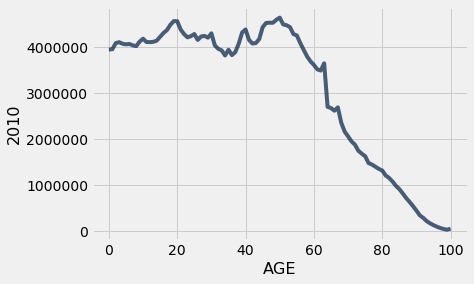

In [109]:
everyone.plot('AGE','2010')